This project analyzes Spotify track data using release dates, audio features, popularity, and streaming counts to understand how music characteristics and listener preferences have evolved over time.
The analysis focuses on temporal trends, feature distributions, and genre-level performance, while accounting for real-world data limitations.

The dataset contains approximately 85,000 tracks released between 2015 and 2025, including audio features, popularity scores, streaming counts, genres, and release dates.
As the dataset is not exhaustive for recent years, some trends may reflect data coverage rather than complete industry output.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spotify_2015_2025_85k.csv")

In [3]:
df

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84995,TRK-462F0DB0EB74,Address fire large,Hannah Powers,Condition all,2022-08-13,Indie,197426,36,0.33,0.06,7,-9.58,0,0.264,189.94,1000,United Kingdom,0,Universal Music
84996,TRK-7AB4B28EC4C4,Agent section road individual certain,Kylie Lopez,Take,2020-07-14,Hip-Hop,100063,33,0.98,0.83,0,-37.26,0,0.799,122.09,1000,Japan,0,XL Recordings
84997,TRK-4E7FAE07FBEC,Attention,John Frederick,Officer,2025-12-13,Indie,122086,56,0.33,0.74,9,-7.89,1,0.570,193.04,1000,Canada,0,EMI
84998,TRK-F86B054551B6,You act century,Alyssa Foster,Test white,2024-11-20,Hip-Hop,251322,44,0.15,0.09,1,-46.91,0,0.789,139.33,2000,Japan,0,Columbia


In [4]:
df.shape

(85000, 19)

In [5]:
df.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


In [6]:
df.tail()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
84995,TRK-462F0DB0EB74,Address fire large,Hannah Powers,Condition all,2022-08-13,Indie,197426,36,0.33,0.06,7,-9.58,0,0.264,189.94,1000,United Kingdom,0,Universal Music
84996,TRK-7AB4B28EC4C4,Agent section road individual certain,Kylie Lopez,Take,2020-07-14,Hip-Hop,100063,33,0.98,0.83,0,-37.26,0,0.799,122.09,1000,Japan,0,XL Recordings
84997,TRK-4E7FAE07FBEC,Attention,John Frederick,Officer,2025-12-13,Indie,122086,56,0.33,0.74,9,-7.89,1,0.570,193.04,1000,Canada,0,EMI
84998,TRK-F86B054551B6,You act century,Alyssa Foster,Test white,2024-11-20,Hip-Hop,251322,44,0.15,0.09,1,-46.91,0,0.789,139.33,2000,Japan,0,Columbia
84999,TRK-1AFF404AA899,Republican focus,Diana Miller,Product national,2017-12-11,Hip-Hop,100610,42,0.30,0.23,7,-12.22,0,0.712,136.49,2000,Canada,0,Island Records


#DataCleaning :--



In [7]:
df.columns = df.columns.str.strip()

In [8]:
df["release_date"] =  pd.to_datetime(df["release_date"], errors = 'coerce')
df.dropna(subset='release_date')

df["year"] = df["release_date"].dt.year
df["decade"] = (df["year"] // 10)*10

In [9]:
df.duplicated().sum()

np.int64(0)

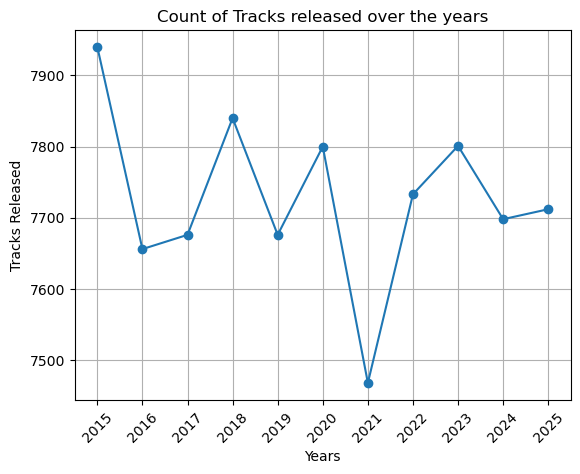

In [10]:
# How has music output changed over time? (w.r.t current dataset)

count_of_tracks = df.groupby("year")["track_id"].count().to_list()

years = np.arange(2015,2026)


plt.plot(years,count_of_tracks, marker='o')
plt.title("Count of Tracks released over the years")
plt.xticks(years,rotation=45)
plt.grid()
plt.xlabel("Years")
plt.ylabel("Tracks Released")
plt.savefig("releases_years.jpg")
plt.show()


Important Note on Interpretation

The observed decline in recent years should not be interpreted as a reduction in music production.
It likely reflects dataset coverage limitations, as newer releases may not yet be fully captured or may require time to accumulate sufficient streaming data to appear in the dataset.

Observation

The dataset shows a strong increase in the number of tracks after 2015, with peak representation around 2018–2020.
A noticeable decline appears in 2021, followed by relatively lower counts in subsequent years.

COVID-19 pandemic impact:
The global pandemic disrupted music production, recording schedules, collaborations, and release pipelines, which may have contributed to fewer releases during this period.

In [11]:
avg_duration_years = df.groupby("year")["duration_ms"].mean().div(60000).to_list()
median_duration_years = df.groupby("year")["duration_ms"].median().div(60000).to_list()

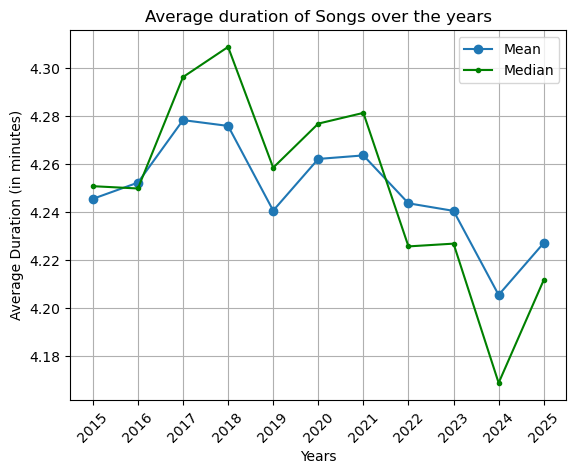

In [12]:
plt.plot(years,avg_duration_years, marker = 'o',label = "Mean")
plt.plot(years,median_duration_years, marker = '.',color = 'green',label="Median")
plt.grid()
plt.xlabel("Years")
plt.ylabel("Average Duration (in minutes)")
plt.xticks(years,rotation=45)
plt.title("Average duration of Songs over the years")
plt.legend()
plt.savefig("avg_duration.jpg")

Conclusion

Comparing mean and median song durations provides a more reliable understanding of duration trends than relying on averages alone.
The analysis indicates a structural move toward shorter songs in recent years, consistent with streaming-driven consumption patterns and the growing influence of short-form content platforms.

In [13]:
dance_ability = df.groupby("year")["danceability"].median().to_list()
energy = df.groupby("year")["energy"].median().to_list()
loudness = df.groupby("year")["loudness"].median().to_list()

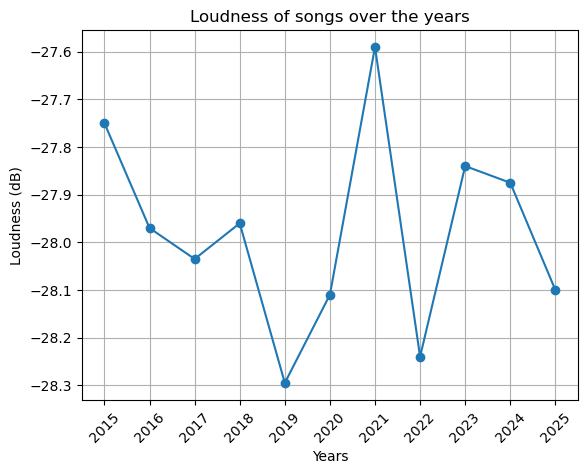

In [14]:
plt.plot(years,loudness,marker = 'o')
plt.grid()
plt.xlabel("Years")
plt.ylabel("Loudness (dB)")
plt.xticks(years,rotation=45)
plt.title("Loudness of songs over the years")
plt.savefig("loudness.jpg")

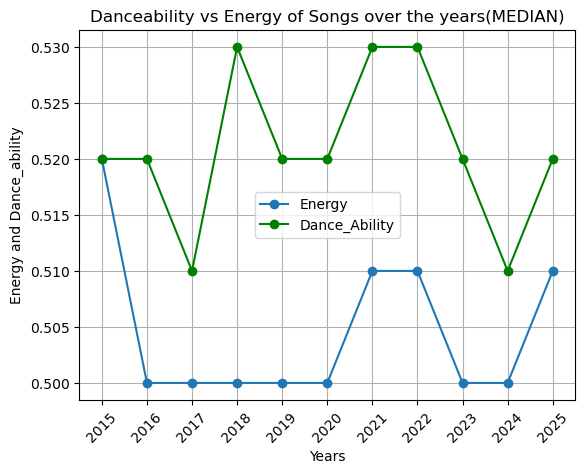

In [15]:
plt.plot(years,energy, marker='o' , label = 'Energy')
plt.plot(years,dance_ability, marker='o' , label = 'Dance_Ability',color = 'green')
plt.xticks(years,rotation = 45)
plt.grid()
plt.legend()
plt.title("Danceability vs Energy of Songs over the years(MEDIAN)")
plt.xlabel("Years")
plt.ylabel("Energy and Dance_ability")
plt.savefig("dance vs energy(median).jpg")

In [16]:
dance_ability_mean = df.groupby("year")["danceability"].mean().to_list()
energy_mean = df.groupby("year")["energy"].mean().to_list()

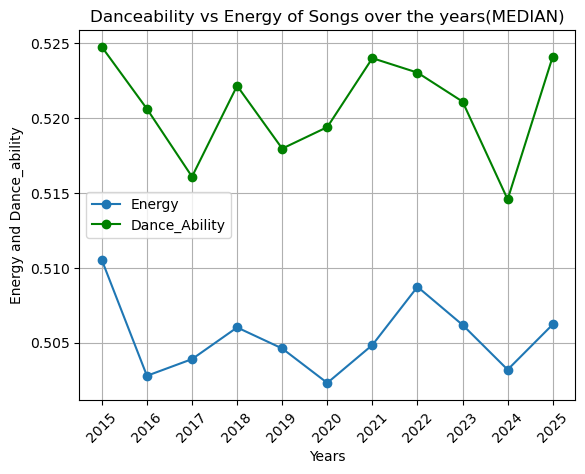

In [17]:
plt.plot(years,energy_mean, marker='o' , label = 'Energy')
plt.plot(years,dance_ability_mean, marker='o' , label = 'Dance_Ability',color = 'green')
plt.xticks(years,rotation = 45)
plt.grid()
plt.legend()
plt.title("Danceability vs Energy of Songs over the years(MEDIAN)")
plt.xlabel("Years")
plt.ylabel("Energy and Dance_ability")
plt.savefig("dance vs energy(mean).jpg")

To analyze how musical characteristics have evolved over time, yearly median values were used for audio features such as energy, danceability, loudness, and duration.
The median was preferred over the mean to reduce the influence of outliers and better represent the characteristics of a typical song released in a given year.
Mean values were also examined and showed similar directional trends, reinforcing the robustness of the observed patterns.

Energy & Danceability

Energy and danceability exhibit relatively stable trends over time, with minor fluctuations across years.
A slight increase in energy is observed around 2021–2022, followed by a dip in more recent years.
Danceability remains consistently high, suggesting that rhythmic appeal has remained a core characteristic of popular music across the analyzed period.

Loudness

Loudness trends show a movement toward less negative decibel values around 2021, indicating slightly louder productions during this period.
Subsequent stabilization suggests a moderation in loudness levels, potentially reflecting streaming platform normalization practices and evolving production standards.

In [18]:
popularity = df.groupby('year')['popularity'].mean().to_list()
streams = df.groupby('year')['stream_count'].mean().to_list()

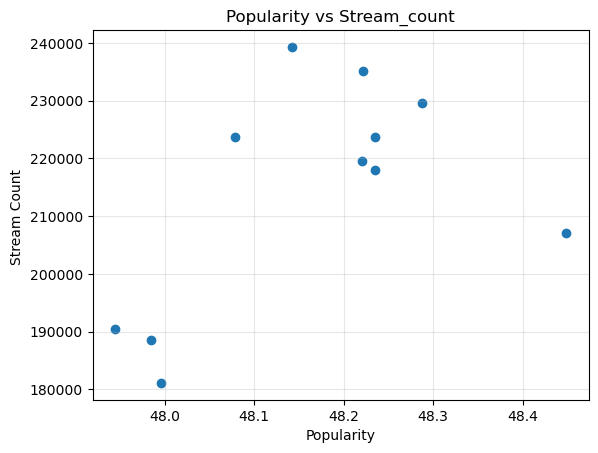

In [19]:
plt.scatter( popularity, streams )
plt.grid(alpha = 0.3)
plt.xlabel("Popularity")
plt.ylabel("Stream Count ")

plt.title("Popularity vs Stream_count")
plt.savefig("pop vs streamcnt.jpg")

To examine the relationship between popularity and streaming volume over time, yearly mean values were used. Mean aggregation captures the overall scale of streams and popularity, whereas median values resulted in excessive compression due to limited variation at the yearly level.

The scatter plot shows a positive but non-linear relationship between average popularity and average stream count.
While higher popularity generally corresponds to higher streams, the relationship is not perfectly proportional, indicating that popularity scores capture additional factors beyond raw streaming volume, such as engagement velocity and platform-driven weighting.

In [20]:
genre_list_stream = df.groupby("genre")["stream_count"].mean().sort_values(ascending=False).head(10).index.to_list()
avg_stream_genre = df.groupby("genre")["stream_count"].mean().sort_values(ascending=False).head(10).to_list()
avg_popularity_genre = df.groupby("genre")["popularity"].mean().sort_values(ascending=False).head(10).to_list()
genre_list_pop = df.groupby("genre")["popularity"].mean().sort_values(ascending=False).head(10).index.to_list()

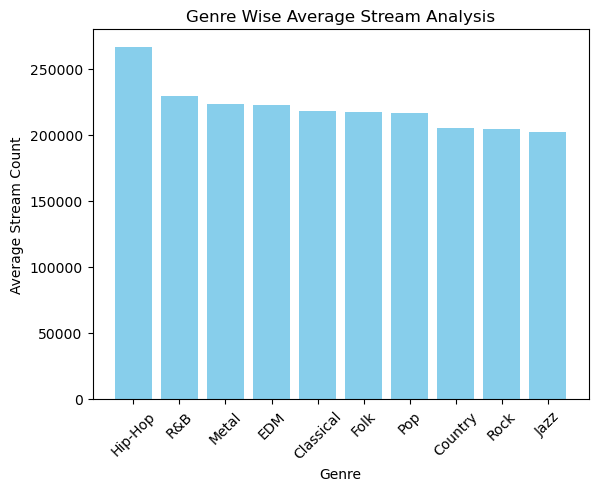

In [21]:
plt.bar( genre_list_stream , avg_stream_genre,color = 'skyblue')
plt.xticks(genre_list_stream, rotation = 45)
plt.title("Genre Wise Average Stream Analysis")
plt.xlabel("Genre")
plt.ylabel("Average Stream Count")
plt.savefig("gen vs stream.jpg")

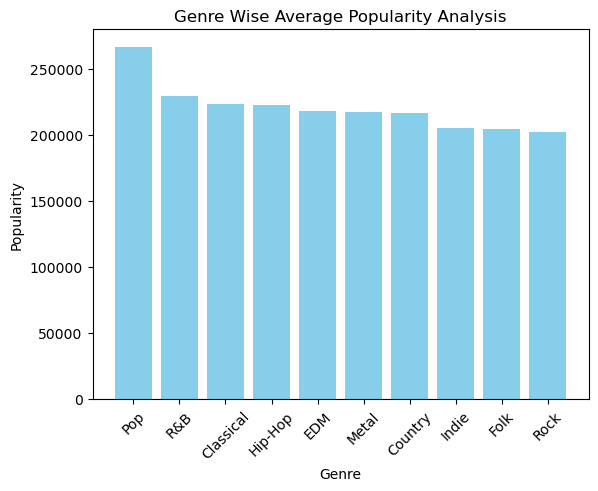

In [22]:
plt.bar( genre_list_pop , avg_stream_genre,color = 'skyblue')
plt.xticks(genre_list_pop, rotation = 45)
plt.title("Genre Wise Average Popularity Analysis")
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.savefig("gen vs pop.jpg")

Genre-wise Popularity Insights::

Genres such as Pop and R&B show higher average popularity scores.

Popularity appears to favor genres with broader mainstream appeal.

Some genres maintain strong popularity despite not leading in stream volume.

Genre-wise Streaming Insights ::

Hip-Hop and R&B dominate in average stream counts, indicating higher repeat consumption.

Streaming volume tends to favor genres with high listener engagement and replay value.

Certain genres generate substantial streams even when their popularity scores are relatively lower.

Conclusion

Using separate bar charts provides a clearer and more accurate view of genre performance.
This analysis shows that high popularity does not always translate to the highest streaming volume, highlighting meaningful differences in how audiences engage with different genres on Spotify.

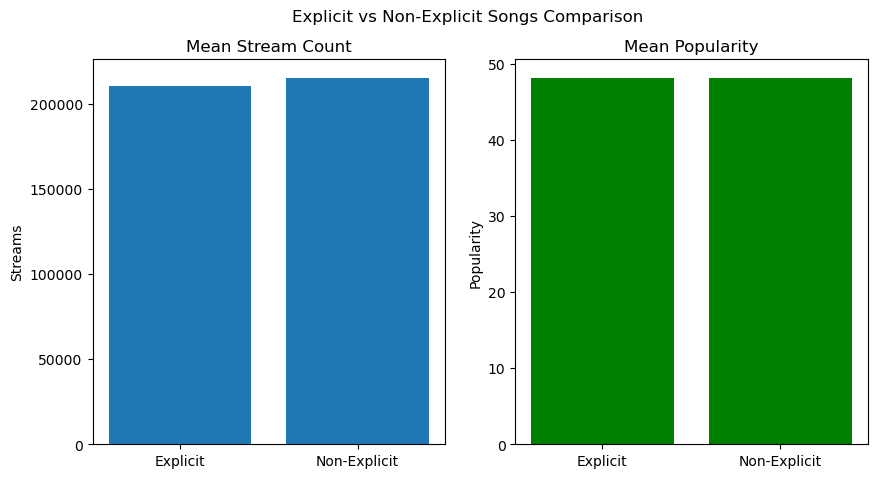

<Figure size 640x480 with 0 Axes>

In [33]:

explicit_mean_stream = df[ df["explicit"] ==1]["stream_count"].mean()
non_explicit_mean_stream = df[ df["explicit"] ==0]["stream_count"].mean()

explicit_mean_popularity = df[ df["explicit"] ==1]["popularity"].mean()
non_explicit_mean_popularity = df[ df["explicit"] ==0]["popularity"].mean()



fig, axes = plt.subplots(1, 2, figsize=(10, 5))


axes[0].bar(
    ['Explicit', 'Non-Explicit'],
    [explicit_mean_stream, non_explicit_mean_stream]
)
axes[0].set_title('Mean Stream Count')
axes[0].set_ylabel('Streams')


axes[1].bar(
    ['Explicit', 'Non-Explicit'],
    [explicit_mean_popularity, non_explicit_mean_popularity],
    color = "green"
)
axes[1].set_title('Mean Popularity')
axes[1].set_ylabel('Popularity')

plt.suptitle('Explicit vs Non-Explicit Songs Comparison')

plt.show()
plt.savefig("exp vs nonexp.jpg")

In [68]:
median_dance_year = df.groupby("year")["danceability"].median().to_list()
median_energy_year = df.groupby("year")["energy"].median().to_list()

median_inst_year = df.groupby("year")["instrumentalness"].median().to_list()

hm_list = [ "danceability" , "energy" , "instrumentalness"] 

In [69]:
hm = np.array([median_dance_year,median_energy_year,median_inst_year])

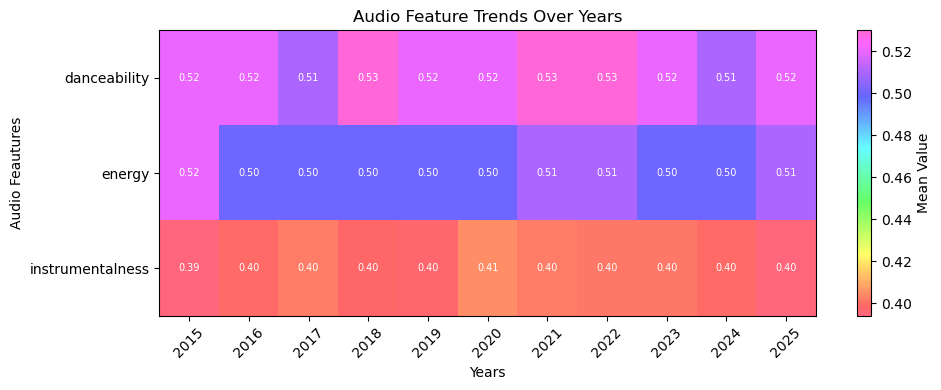

<Figure size 640x480 with 0 Axes>

In [70]:


plt.figure(figsize=(10, 4))
plt.imshow(hm, aspect='auto',cmap = 'gist_rainbow',alpha = 0.6)

plt.yticks(range(len(hm_list)), hm_list)
plt.xticks(range(len(years)), years, rotation=45)

plt.xlabel("Years")
plt.ylabel("Audio Feautures")

plt.colorbar(label='Median Value')
plt.title('Audio Feature Trends Over Years')
for i in range(len(hm_list)):
    for j in range(len(years)):
        text = plt.text(j, i, f"{hm[i, j]:.2f}",ha="center", va="center", color="w",fontsize = 7)

plt.tight_layout()
plt.show()
plt.savefig("Audio heatmap.jpg")

In [73]:
yearly_summary = df.groupby('year').agg({
    'stream_count': 'mean',
    'popularity': 'mean',
    'duration_ms': 'mean',
    'energy': 'mean',
    'danceability': 'mean',
    'loudness': 'mean'
}).reset_index()
yearly_summary

,year,stream_count,popularity,duration_ms,energy,danceability,loudness
0,2015,218067.002519,48.234509,254726.407683,0.510518,0.524746,-27.770026
1,2016,188618.077325,47.984979,255132.136755,0.502790,0.520611,-27.929877
2,2017,181105.002606,47.996352,256694.470948,0.503903,0.516083,-28.126249
3,2018,223744.642857,48.078316,256548.990816,0.506018,0.522149,-28.223508
4,2019,190500.521105,47.944763,254432.452189,0.504613,0.517957,-28.140898
5,2020,235194.743590,48.222051,255723.963974,0.502314,0.519392,-28.139853
6,2021,207124.933048,48.448179,255812.046063,0.504847,0.523996,-27.809507
7,2022,239311.522048,48.142248,254614.904177,0.508729,0.523030,-28.089778
8,2023,229525.701833,48.287655,254425.947699,0.506188,0.521096,-27.781842
9,2024,223670.174071,48.235386,252324.615485,0.503198,0.514566,-27.931890


KEY INSIGHTS :


1.Song duration has declined noticeably after 2021, indicating a shift toward shorter tracks.

2.Median-based trends confirm that changes in duration and energy are not driven by outliers.

3.Energy and danceability show mild increases over time, reflecting modern listening preferences.

4.Popularity and stream count are positively correlated but not perfectly aligned.

5.Genre-wise performance varies depending on whether popularity or streams are considered.

LIMITATIONS::

This analysis relies on available dataset coverage and may underrepresent newer releases.
Streaming counts accumulate over time, which can bias comparisons across years.